**REGRESIÓN LOGÍSTICA - RAFAEL AUGUSTO MENDOZA NIEVES - UNAD**

**1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.**

In [1]:
#Cargar las librerias necesrias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('./heart_cleveland_upload.csv')

In [4]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [5]:
# Descripción de los datos
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

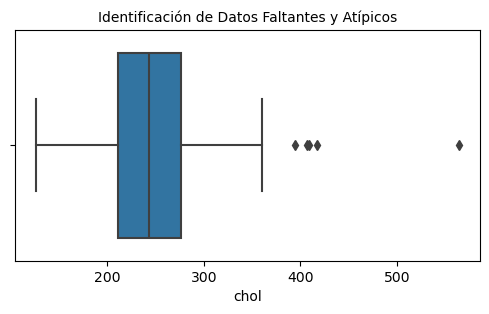

In [7]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['chol'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

**2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario**

In [8]:
#Revisión de datos faltantes
print("Cantidad de Registros con cero en Nivel de Presión Arterial: ",Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel de Colesterol: ",Datos['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en Frecuencia Cardiaca: ",Datos['thalach'].isin([0]).sum())

Cantidad de Registros con cero en Nivel de Presión Arterial:  0
Cantidad de Registros con cero en Nivel de Colesterol:  0
Cantidad de Registros con cero en Frecuencia Cardiaca:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

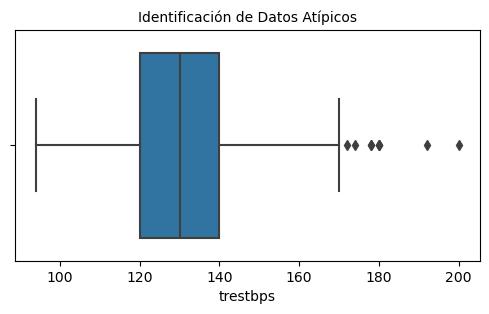

In [9]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [10]:
#Conteo de Datos Atípicos

nivel_minimo=1
nivel_maximo=190
Total_Atipicos=((Datos['trestbps']<nivel_minimo)|(Datos['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 2


In [11]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['trestbps']<nivel_maximo)&(Datos['trestbps']>nivel_minimo)]

In [12]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((Datos['trestbps']<nivel_minimo)|(Datos['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [13]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        295 non-null    int64  
 1   sex        295 non-null    int64  
 2   cp         295 non-null    int64  
 3   trestbps   295 non-null    int64  
 4   chol       295 non-null    int64  
 5   fbs        295 non-null    int64  
 6   restecg    295 non-null    int64  
 7   thalach    295 non-null    int64  
 8   exang      295 non-null    int64  
 9   oldpeak    295 non-null    float64
 10  slope      295 non-null    int64  
 11  ca         295 non-null    int64  
 12  thal       295 non-null    int64  
 13  condition  295 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.6 KB


**3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características**

*Para este caso se toma en cuenta la variable (Condition) ya que si equivale a 0 quiere decir que no presenta enfermedad cardíaca*
*pero si el valor es 1 quiere decir que si presenta enfermedad cardíaca*

In [14]:
# Total de personas con enfermedad cardíaca

Datos['condition'].value_counts()

condition
0    160
1    135
Name: count, dtype: int64

In [15]:
Datos[['condition']].head(30)

,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


**4. Dividir el dataset en Train y Test para evaluar correctamente el modelo**

*El porcentaje de datos para entrenamiento (train) será de = 75% , y para prueba será de (test) = 25%,*
*se crean variables X y Y para almacenar la información del entrenamiento.*

In [16]:
X = Datos.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = Datos['condition'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [17]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
293   39    1   3       118   219    0        0      140      0      1.2   
82    66    0   2       146   278    0        2      152      0      0.0   
36    56    1   1       120   240    0        0      169      0      0.0   
221   58    1   3       125   300    0        2      171      0      0.0   
20    40    1   0       140   199    0        0      178      1      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
32    58    0   1       136   319    1        2      152      0      0.0   
240   55    1   3       132   353    0        0      132      1      1.2   
226   57    1   3       152   274    0        0       88      1      1.2   
135   46    0   2       142   177    0        2      160      1      1.4   
106   56    1   2       130   256    1        2      142      1      0.6   

     slope  ca  thal  
293      1   0     2  
82       1   1     0  
36       2   0    

In [18]:
print (Y_train)

293    1
82     0
36     0
221    1
20     0
      ..
32     1
240    1
226    1
135    0
106    1
Name: condition, Length: 221, dtype: int64


**5. Entrenar el modelo configurando los diferentes hiperparámetros**

In [19]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [20]:
print (Y_test)

111    0
267    1
163    1
170    1
285    0
      ..
278    0
213    1
137    0
279    1
11     1
Name: condition, Length: 74, dtype: int64


In [21]:
print (Prediccion)

[0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0
 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0]


**6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc**

In [22]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        40
           1       0.90      0.82      0.86        34

    accuracy                           0.88        74
   macro avg       0.88      0.87      0.88        74
weighted avg       0.88      0.88      0.88        74



**7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo**

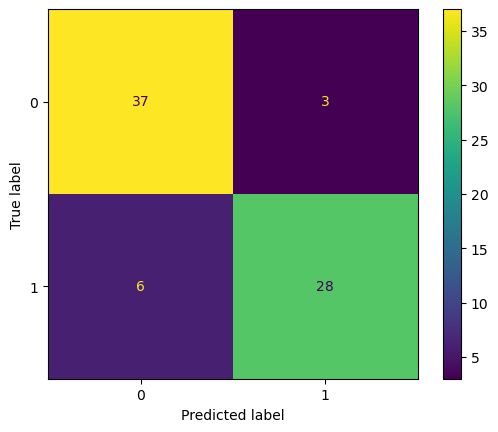

In [23]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

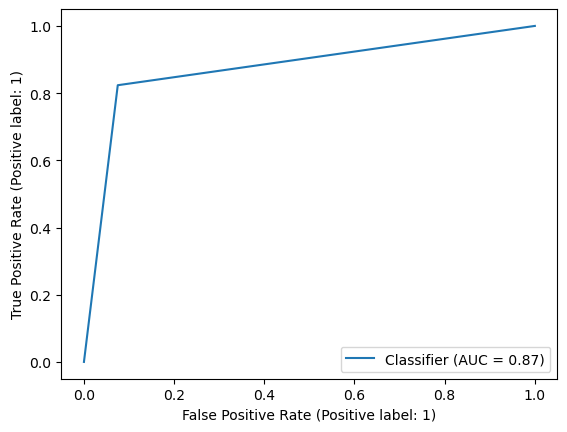

In [24]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

**8. Interpretar, analizar y documentar los resultados obtenidos**

*Al dar por terminado el paso a paso de este ejercicio de regresión logística pudimos observar que el nivel de precisión del modelo teniendo en cuenta la variable (condition) fue de 0,90 lo que en datos porcentuales muestra que el 90 % de los datos encontrados con enfermedad cardíaca en efecto si presentaban dicha enfermedad.*

*Ahora el valor encontrado referente al concepto recall y a la misma variable es de 0,82 de lo cual se infiere que el 82 % de los datos encontrados con enfermedad cardíaca si eran pacientes con enfermedad cardíaca. Por otro lado, el valor del F1-score en base a la misma variable (condition) es de 0,86 este valor muestra que hay un equilibrio entre los valores de precisión y recall.*

*Ahora si se tiene en cuenta los resultados de la grafica de matriz de confusión se pudo evidenciar lo siguiente:
El numero de pacientes en la gráfica que en realidad presentaron enfermedad cardíaca es de 28, mientras que 37 pacientes no presentaban enfermedad cardíaca, pero en contraste con estos resultados que si fueron acertados tenemos a 6 pacientes los cuales al parecer presentaban enfermedad cardíaca, pero en realidad no y 3 pacientes que no parecían tener enfermedad cardíaca, pero si la tenían.*

*Por último, de la grafica de la curva de precisión y basado en el valor visto de 0,87 se puede inferir que el 87% de las predicciones obtenidas son correctas.*
